# Proyecto Machine Learning - Prediccion precio Bitcoin
Se busca predecir el precio de Bitcoin de un dia a otro para soportar desiciones dentro de un portafolio de cripto activos

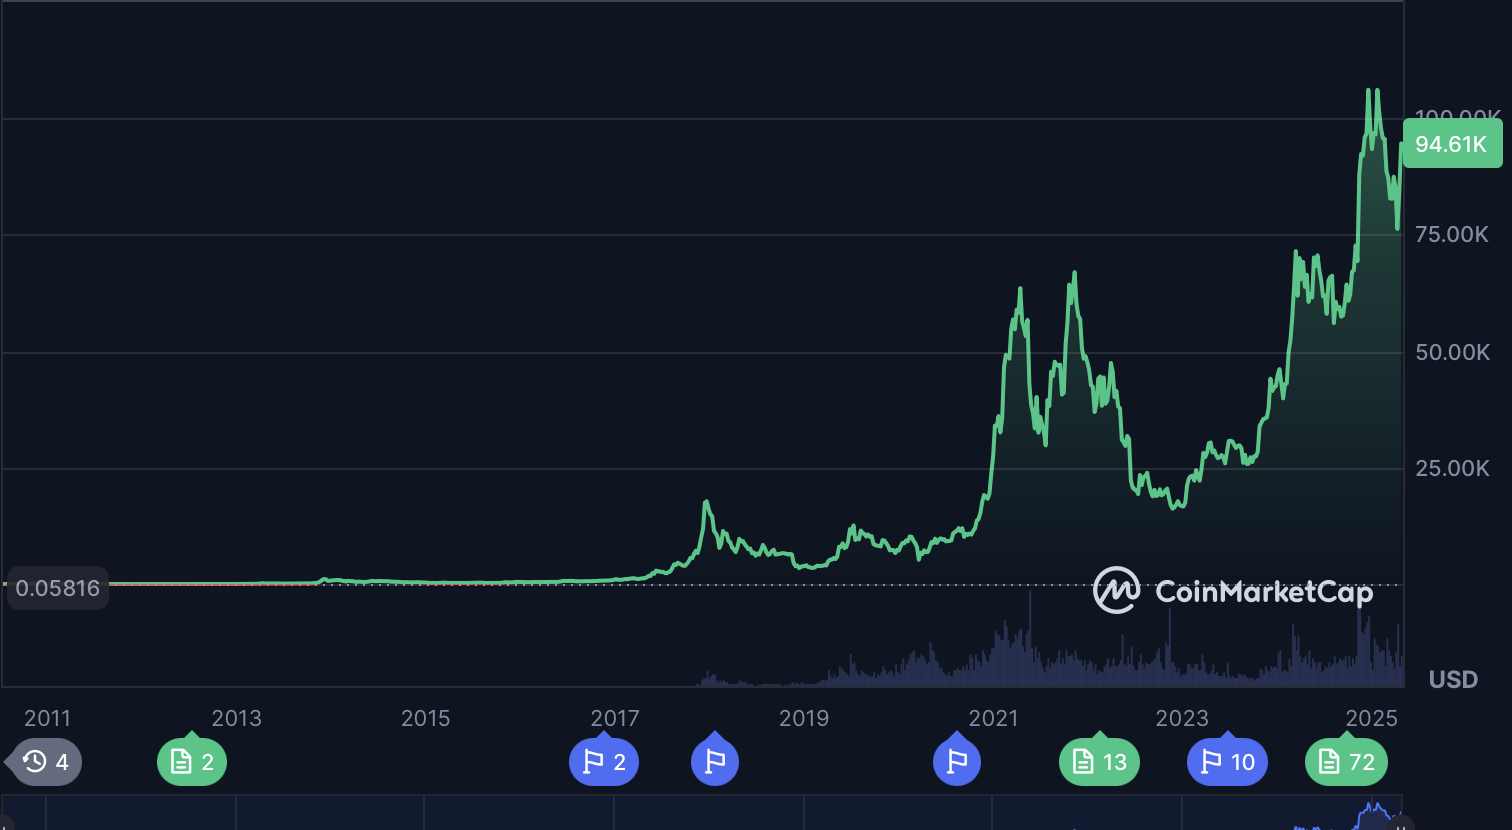

<h3>La variable objetivo es el precio de bitcoin y se buscara predecir al para el dia siguiente. Siendo que el precio de bitcoin ya no tiene variaciones tan altas de un dia a otro, servira como parametro para tomar decisiones sobre activos mas pequenos y mucho mas volatiles.</h3>

1. Precio Histórico de Bitcoin (Price)
Descripción: Representa el precio de Bitcoin en un momento específico (diario, semanal, etc.).
Relevancia: Es la variable objetivo en la mayoría de los casos. Los precios históricos son fundamentales para identificar tendencias y patrones en el mercado.
2. Volumen de Transacciones (Volume)
Descripción: Cantidad de Bitcoin transaccionada en un período de tiempo.
Relevancia: Un volumen alto puede indicar un mercado activo, mientras que un volumen bajo puede reflejar incertidumbre o falta de interés.
3. Hash Rate (Hash Rate)
Descripción: Representa la potencia computacional total utilizada para minar Bitcoin.
Relevancia: Un hash rate alto indica una red más segura y activa, lo que puede influir en la confianza de los inversores.
4. Dificultad de Minería (Mining Difficulty)
Descripción: Mide la dificultad para minar un bloque en la red de Bitcoin.
Relevancia: Una mayor dificultad puede reflejar un aumento en la competencia entre los mineros, lo que puede estar relacionado con el precio.
5. Índice de Miedo y Avaricia (Fear and Greed Index)
Descripción: Mide el sentimiento del mercado en una escala de miedo extremo a avaricia extrema.
Relevancia: Un índice alto (avaricia) puede indicar un mercado sobrevalorado, mientras que un índice bajo (miedo) puede señalar oportunidades de compra.
6. Precio del Petróleo (Oil Price)
Descripción: Precio del petróleo crudo (WTI o Brent).
Relevancia: Aunque no está directamente relacionado con Bitcoin, puede influir en los mercados globales y, por ende, en el comportamiento de los inversores.
7. Volumen de Transacciones (Volume)
Descripción: Cantidad de Oil transaccionada en un período de tiempo.
Relevancia: Un volumen alto puede indicar un mercado activo, mientras que un volumen bajo puede reflejar incertidumbre o falta de interés.
8. Índice de Volatilidad del Mercado (VIX)
Descripción: Mide la volatilidad esperada en los mercados financieros.
Relevancia: Un VIX alto puede reflejar incertidumbre en los mercados tradicionales, lo que podría llevar a los inversores a buscar activos alternativos como Bitcoin.
9. Índice de Precios al Consumidor (CPI)
Descripción: Mide la inflación en una economía.
Relevancia: Una inflación alta puede llevar a los inversores a buscar refugio en activos como Bitcoin, que a menudo se percibe como una reserva de valor.
10. Tasa de Interés (Interest Rate)
Descripción: Tasa de interés fijada por los bancos centrales.
Relevancia: Tasas de interés bajas pueden incentivar la inversión en activos de mayor riesgo, como Bitcoin.

Potenciales:

11. Precio y volumen del oro

<h3>Importo bibliotecas y traigo los data sets</h3>

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [157]:
df_btc_historical = pd.read_csv('data/Bitcoin Historical Data.csv')
df_oil_WTI_futures = pd.read_csv('data/Crude Oil WTI Futures Historical Data.csv')
df_vix = pd.read_csv('data/CBOE Volatility Index Historical Data.csv')
df_cpi = pd.read_csv('data/CPIAUCSL.csv')
df_int_rate = pd.read_csv('data/Federal Funds Composite Interest Rate Historical Data.csv')


Solo consegui json que contenga el difficulty de minar btc. Lo convierto en csv y luego de data frame

In [158]:
import json
from datetime import datetime

with open('Data/difficulty.json', 'r') as file:
    data = json.load(file)

difficulty_list = data['difficulty']
market_price_list = data['market-price']

def timestamp_to_date(timestamp_ms):
    return datetime.utcfromtimestamp(timestamp_ms / 1000).strftime('%Y-%m-%d')

df_difficulty = pd.DataFrame(difficulty_list)
df_difficulty['date'] = df_difficulty['x'].apply(timestamp_to_date)
df_difficulty = df_difficulty[['date', 'y']]
df_difficulty.columns = ['date', 'difficulty']

df_market_price = pd.DataFrame(market_price_list)
df_market_price['date'] = df_market_price['x'].apply(timestamp_to_date)
df_market_price = df_market_price[['date', 'y']]
df_market_price.columns = ['date', 'market_price']

df_difficulty_btc = pd.merge(df_difficulty, df_market_price, on='date', how='outer')

df_difficulty_btc.to_csv('bitcoin_difficulty.csv', index=False)

df_difficulty_btc = pd.read_csv('bitcoin_difficulty.csv')

df_difficulty_btc.to_csv('data/bitcoin_difficulty.csv', index=False)


/var/folders/9d/njcmv3bs67bgg_6p6s5pyjsw0000gn/T/ipykernel_20814/2357875839.py:11: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return datetime.utcfromtimestamp(timestamp_ms / 1000).strftime('%Y-%m-%d')
/var/folders/9d/njcmv3bs67bgg_6p6s5pyjsw0000gn/T/ipykernel_20814/2357875839.py:11: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return datetime.utcfromtimestamp(timestamp_ms / 1000).strftime('%Y-%m-%d')


Lo mismo con el hash rate

In [159]:
with open('Data/hash-rate.json', 'r') as file:
    data = json.load(file)

hash_rate_list = data['hash-rate']
market_price_list = data['market-price']

def timestamp_to_date(timestamp_ms):
    return datetime.utcfromtimestamp(timestamp_ms / 1000).strftime('%Y-%m-%d')

df_hash_rate = pd.DataFrame(hash_rate_list)
df_hash_rate['date'] = df_hash_rate['x'].apply(timestamp_to_date)
df_hash_rate = df_hash_rate[['date', 'y']]
df_hash_rate.columns = ['date', 'hash_rate']

df_market_price = pd.DataFrame(market_price_list)
df_market_price['date'] = df_market_price['x'].apply(timestamp_to_date)
df_market_price = df_market_price[['date', 'y']]
df_market_price.columns = ['date', 'market_price']

df_hash_btc = pd.merge(df_hash_rate, df_market_price, on='date', how='outer')

df_hash_btc.to_csv('bitcoin_hash_rate_data.csv', index=False)

df_hash_btc = pd.read_csv('bitcoin_hash_rate_data.csv')

df_hash_btc.to_csv('data/bitcoin_hash_rate.csv', index=False)

df_hash_btc

/var/folders/9d/njcmv3bs67bgg_6p6s5pyjsw0000gn/T/ipykernel_20814/4056137689.py:8: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return datetime.utcfromtimestamp(timestamp_ms / 1000).strftime('%Y-%m-%d')
/var/folders/9d/njcmv3bs67bgg_6p6s5pyjsw0000gn/T/ipykernel_20814/4056137689.py:8: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return datetime.utcfromtimestamp(timestamp_ms / 1000).strftime('%Y-%m-%d')


,date,hash_rate,market_price
0,2009-01-10,1.065220e-07,0.000000
1,2009-01-14,2.521021e-06,0.000000
2,2009-01-18,5.588855e-06,0.000000
3,2009-01-22,5.681174e-06,0.000000
4,2009-01-26,6.270595e-06,0.000000
...,...,...,...
1484,2025-04-12,8.828260e+08,80476.141429
1485,2025-04-16,8.904959e+08,82200.015714
1486,2025-04-20,8.993776e+08,84370.458571
1487,2025-04-24,8.237550e+08,86382.025714


Obtengo de un API el fear and greed index (analisis de sentimiento)

In [160]:
import requests

url = "https://api.alternative.me/fng/?limit=0"

response = requests.get(url)
data = response.json()

df_fear_greed = pd.DataFrame(data['data'])

df_fear_greed['timestamp'] = pd.to_datetime(df_fear_greed['timestamp'], unit='s')

df_fear_greed.to_csv('data/fear_greed_index.csv', index=False)

df_fear_greed


/var/folders/9d/njcmv3bs67bgg_6p6s5pyjsw0000gn/T/ipykernel_20814/2175154703.py:10: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df_fear_greed['timestamp'] = pd.to_datetime(df_fear_greed['timestamp'], unit='s')


,value,value_classification,timestamp,time_until_update
0,59,Greed,2025-05-06,27243
1,52,Neutral,2025-05-05,NaN
2,64,Greed,2025-05-04,NaN
3,65,Greed,2025-05-03,NaN
4,67,Greed,2025-05-02,NaN
...,...,...,...,...
2643,11,Extreme Fear,2018-02-05,NaN
2644,24,Extreme Fear,2018-02-04,NaN
2645,40,Fear,2018-02-03,NaN
2646,15,Extreme Fear,2018-02-02,NaN


<h3>Limpieza de data frames</h3>

In [161]:
df_btc_historical['date'] = pd.to_datetime(df_btc_historical['Date'])

df_btc_historical['close_btc'] = df_btc_historical['Price'].str.replace('[\$,\.]', '', regex=True).astype(float)

df_btc_historical['volume'] = df_btc_historical['Vol.'].str.replace('K', 'e3').str.replace('M', 'e6').str.replace('B', 'e9')
df_btc_historical['volume'] = df_btc_historical['volume'].str.replace(',', '').astype(float)

df_btc_historical = df_btc_historical[['date', 'close_btc', 'volume']]

df_btc_historical = df_btc_historical.sort_values('date')

df_btc_historical



<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
/var/folders/9d/njcmv3bs67bgg_6p6s5pyjsw0000gn/T/ipykernel_20814/1376515549.py:3: SyntaxWarning: invalid escape sequence '\$'
  df_btc_historical['close_btc'] = df_btc_historical['Price'].str.replace('[\$,\.]', '', regex=True).astype(float)


,date,close_btc,volume
1945,2020-01-01,71998.0,420280.0
1944,2020-01-02,69670.0,632780.0
1943,2020-01-03,73431.0,936290.0
1942,2020-01-04,73768.0,523910.0
1941,2020-01-05,73725.0,628140.0
...,...,...,...
4,2025-04-25,946769.0,92040.0
3,2025-04-26,946314.0,33770.0
2,2025-04-27,937425.0,36660.0
1,2025-04-28,949950.0,73630.0


In [162]:
df_oil_WTI_futures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1397 entries, 0 to 1396
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1397 non-null   object 
 1   Price     1397 non-null   float64
 2   Open      1397 non-null   float64
 3   High      1397 non-null   float64
 4   Low       1397 non-null   float64
 5   Vol.      1339 non-null   object 
 6   Change %  1397 non-null   object 
dtypes: float64(4), object(3)
memory usage: 76.5+ KB


In [163]:
df_oil_WTI_futures

df_oil_WTI_futures['date'] = pd.to_datetime(df_oil_WTI_futures['Date'])

df_oil_WTI_futures['close_WTI'] = df_oil_WTI_futures['Price']

df_oil_WTI_futures['volume'] = df_oil_WTI_futures['Vol.'].str.replace('K', 'e3').str.replace('M', 'e6').str.replace('B', 'e9')
df_oil_WTI_futures['volume'] = df_oil_WTI_futures['volume'].str.replace(',', '').astype(float)

df_oil_WTI_futures = df_oil_WTI_futures[['date', 'close_WTI', 'volume']]

df_oil_WTI_futures = df_oil_WTI_futures.sort_values('date')

df_oil_WTI_futures

,date,close_WTI,volume
1396,2020-01-01,61.33,NaN
1395,2020-01-02,60.95,101520.0
1394,2020-01-03,62.82,236060.0
1393,2020-01-06,63.04,176990.0
1392,2020-01-07,62.51,173850.0
...,...,...,...
4,2025-04-23,62.27,397840.0
3,2025-04-24,62.79,264910.0
2,2025-04-25,63.02,283760.0
1,2025-04-28,62.05,276120.0


In [164]:
df_vix['date'] = pd.to_datetime(df_vix['Date'])

df_vix['close_vix'] = df_vix['Price']

df_vix['volume'] = df_vix['Vol.']

df_vix = df_vix[['date', 'close_vix', 'volume']]

df_vix = df_vix.sort_values('date')

df_vix

,date,close_vix,volume
1370,2020-01-02,12.47,NaN
1369,2020-01-03,14.02,NaN
1368,2020-01-06,13.85,NaN
1367,2020-01-07,13.79,NaN
1366,2020-01-08,13.45,NaN
...,...,...,...
4,2025-04-23,28.45,NaN
3,2025-04-24,26.47,NaN
2,2025-04-25,24.84,NaN
1,2025-04-28,25.15,NaN


In [165]:
df_cpi

,observation_date,CPIAUCSL
0,2020-01-01,259.127
1,2020-02-01,259.250
2,2020-03-01,258.076
3,2020-04-01,256.032
4,2020-05-01,255.802
...,...,...
58,2024-11-01,316.449
59,2024-12-01,317.603
60,2025-01-01,319.086
61,2025-02-01,319.775


In [166]:
df_cpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   observation_date  63 non-null     object 
 1   CPIAUCSL          63 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.1+ KB


In [ ]:
# Procesar df_cpi primero
df_cpi['date'] = pd.to_datetime(df_cpi['observation_date'])
df_cpi['close_cpi'] = df_cpi['CPIAUCSL']
df_cpi = df_cpi[['date', 'close_cpi']]

# Extraer año y mes de cada fecha en df_cpi
df_cpi['año_mes'] = df_cpi['date'].dt.to_period('M')

# Crear un nuevo DataFrame con todas las fechas diarias de df_vix
fechas_diarias = df_vix[['date']].copy()

# Añadir año y mes a las fechas diarias
fechas_diarias['año_mes'] = fechas_diarias['date'].dt.to_period('M')

# Fusionar los DataFrames usando año_mes como clave
df_cpi_diario = pd.merge(fechas_diarias, df_cpi[['año_mes', 'close_cpi']], 
                         on='año_mes', how='left')

# Eliminar la columna auxiliar año_mes
df_cpi_diario = df_cpi_diario[['date', 'close_cpi']]

# Ordenar por fecha
df_cpi_diario = df_cpi_diario.sort_values('date')

# Si hay valores faltantes (por ejemplo, si df_vix tiene fechas fuera del rango de df_cpi),
# rellenar con el último valor disponible (forward fill)
df_cpi_diario['close_cpi'] = df_cpi_diario['close_cpi'].fillna(method='ffill')

# También podemos hacer backward fill para fechas anteriores al primer registro de CPI
df_cpi_diario['close_cpi'] = df_cpi_diario['close_cpi'].fillna(method='bfill')

# Mostrar el resultado
print(f"DataFrame original df_cpi: {df_cpi.shape} filas")
print(f"DataFrame expandido df_cpi_diario: {df_cpi_diario.shape} filas")
print(df_cpi_diario.head())

# Reemplazar el DataFrame original con el expandido
df_cpi = df_cpi_diario



DataFrame original df_cpi: (63, 3) filas
DataFrame expandido df_cpi_diario: (1371, 2) filas
        date  close_cpi
0 2020-01-02    259.127
1 2020-01-03    259.127
2 2020-01-06    259.127
3 2020-01-07    259.127
4 2020-01-08    259.127


/var/folders/9d/njcmv3bs67bgg_6p6s5pyjsw0000gn/T/ipykernel_20814/3976260358.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cpi['año_mes'] = df_cpi['date'].dt.to_period('M')
/var/folders/9d/njcmv3bs67bgg_6p6s5pyjsw0000gn/T/ipykernel_20814/3976260358.py:30: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cpi_diario['close_cpi'] = df_cpi_diario['close_cpi'].fillna(method='ffill')
/var/folders/9d/njcmv3bs67bgg_6p6s5pyjsw0000gn/T/ipykernel_20814/3976260358.py:33: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cpi_diario['close_cpi'] = df_cpi_diario['close_cpi'].fil

In [168]:
df_cpi


,date,close_cpi
0,2020-01-02,259.127
1,2020-01-03,259.127
2,2020-01-06,259.127
3,2020-01-07,259.127
4,2020-01-08,259.127
...,...,...
1366,2025-04-23,319.615
1367,2025-04-24,319.615
1368,2025-04-25,319.615
1369,2025-04-28,319.615


In [169]:
df_int_rate

,Date,Price,Open,High,Low,Vol.,Change %
0,04/29/2025,4.33,4.33,4.50,4.25,104.00B,0.00%
1,03/26/2025,4.33,4.33,4.33,4.33,NaN,0.00%
2,03/25/2025,4.33,4.33,4.33,4.33,NaN,0.00%
3,03/24/2025,4.33,4.33,4.33,4.33,NaN,0.00%
4,03/21/2025,4.33,4.33,4.33,4.33,NaN,0.00%
...,...,...,...,...,...,...,...
1302,01/08/2020,1.55,1.55,1.55,1.55,NaN,0.00%
1303,01/07/2020,1.55,1.55,1.55,1.55,NaN,0.00%
1304,01/06/2020,1.55,1.55,1.55,1.55,NaN,0.00%
1305,01/03/2020,1.55,1.55,1.55,1.55,NaN,0.00%


In [170]:
df_int_rate['date'] = pd.to_datetime(df_int_rate['Date'])

df_int_rate['close_int'] = df_int_rate['Price']

df_int_rate = df_int_rate[['date', 'close_int']]

df_int_rate = df_int_rate.sort_values('date')

df_int_rate

,date,close_int
1306,2020-01-02,1.55
1305,2020-01-03,1.55
1304,2020-01-06,1.55
1303,2020-01-07,1.55
1302,2020-01-08,1.55
...,...,...
4,2025-03-21,4.33
3,2025-03-24,4.33
2,2025-03-25,4.33
1,2025-03-26,4.33


In [171]:
df_int_rate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1307 entries, 1306 to 0
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1307 non-null   datetime64[ns]
 1   close_int  1307 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 30.6 KB


In [172]:
df_difficulty_btc

,date,difficulty,market_price
0,2009-01-03,1.000000e+00,0.00
1,2009-01-07,0.000000e+00,0.00
2,2009-01-11,1.000000e+00,0.00
3,2009-01-15,1.000000e+00,0.00
4,2009-01-19,1.000000e+00,0.00
...,...,...,...
1486,2025-04-13,1.215078e+14,85283.27
1487,2025-04-17,1.215078e+14,84033.59
1488,2025-04-21,1.232344e+14,85172.64
1489,2025-04-25,1.232344e+14,93970.77


In [173]:
df_difficulty_btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1491 entries, 0 to 1490
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1491 non-null   object 
 1   difficulty    1490 non-null   float64
 2   market_price  1491 non-null   float64
dtypes: float64(2), object(1)
memory usage: 35.1+ KB


In [174]:
df_difficulty_btc['date'] = pd.to_datetime(df_difficulty_btc['date'])

df_difficulty_btc = df_difficulty_btc[['date', 'difficulty']]

df_difficulty_btc

,date,difficulty
0,2009-01-03,1.000000e+00
1,2009-01-07,0.000000e+00
2,2009-01-11,1.000000e+00
3,2009-01-15,1.000000e+00
4,2009-01-19,1.000000e+00
...,...,...
1486,2025-04-13,1.215078e+14
1487,2025-04-17,1.215078e+14
1488,2025-04-21,1.232344e+14
1489,2025-04-25,1.232344e+14


In [189]:
# Forward fill de difficulty_btc para llenar los días intermedios entre actualizaciones
import pandas as pd

# 1. Crear DataFrame con todas las fechas en el rango de interés
# Usando las fechas de df_int_rate como referencia
all_dates = pd.DataFrame({'date': pd.date_range(
    start=df_int_rate['date'].min(),
    end=df_int_rate['date'].max(),
    freq='D'
)})

# 2. Convertir columna date a datetime en df_difficulty_btc si no lo está ya
df_difficulty_btc['date'] = pd.to_datetime(df_difficulty_btc['date'])

# 3. Extraer solo fecha (sin hora) en ambos DataFrames
all_dates['date_only'] = all_dates['date'].dt.date
df_difficulty_btc['date_only'] = df_difficulty_btc['date'].dt.date

# 4. Realizar un merge left para mantener todas las fechas
df_difficulty_filled = pd.merge(
    all_dates, 
    df_difficulty_btc,
    left_on='date_only',
    right_on='date_only',
    how='left'
)

# 5. Aplicar forward fill para propagar el último valor conocido
df_difficulty_filled['difficulty'] = df_difficulty_filled['difficulty'].fillna(method='ffill')

# 6. Si hay fechas anteriores al primer registro de dificultad, aplicar backward fill
df_difficulty_filled['difficulty'] = df_difficulty_filled['difficulty'].fillna(method='bfill')

# 7. Seleccionar solo las columnas necesarias
df_difficulty_complete = df_difficulty_filled[['date_x', 'difficulty']]
df_difficulty_complete.rename(columns={'date_x': 'date'}, inplace=True)

print(f"DataFrame original df_difficulty_btc: {df_difficulty_btc.shape[0]} filas")
print(f"DataFrame completado df_difficulty_complete: {df_difficulty_complete.shape[0]} filas")

# 8. Reemplazar el DataFrame original con el completado
df_difficulty_btc = df_difficulty_complete

# Verificar nuevamente las fechas comunes
df_int_rate['date_only'] = pd.to_datetime(df_int_rate['date']).dt.date
df_difficulty_btc['date_only'] = pd.to_datetime(df_difficulty_btc['date']).dt.date

int_rate_dates = set(df_int_rate['date_only'])
difficulty_dates = set(df_difficulty_btc['date_only'])
common_dates = int_rate_dates.intersection(difficulty_dates)

df_difficulty_btc

DataFrame original df_difficulty_btc: 1945 filas
DataFrame completado df_difficulty_complete: 1945 filas


/var/folders/9d/njcmv3bs67bgg_6p6s5pyjsw0000gn/T/ipykernel_20814/1757689059.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_difficulty_btc['date'] = pd.to_datetime(df_difficulty_btc['date'])
/var/folders/9d/njcmv3bs67bgg_6p6s5pyjsw0000gn/T/ipykernel_20814/1757689059.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_difficulty_btc['date_only'] = df_difficulty_btc['date'].dt.date
/var/folders/9d/njcmv3bs67bgg_6p6s5pyjsw0000gn/T/ipykernel_20814/1757689059.py:29: FutureWarning: Series.fillna with 

,date,difficulty,date_only
0,2020-01-02,1.379878e+13,2020-01-02
1,2020-01-03,1.379878e+13,2020-01-03
2,2020-01-04,1.379878e+13,2020-01-04
3,2020-01-05,1.379878e+13,2020-01-05
4,2020-01-06,1.379878e+13,2020-01-06
...,...,...,...
1940,2025-04-25,1.232344e+14,2025-04-25
1941,2025-04-26,1.232344e+14,2025-04-26
1942,2025-04-27,1.232344e+14,2025-04-27
1943,2025-04-28,1.232344e+14,2025-04-28


In [190]:
df_difficulty_btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1945 entries, 0 to 1944
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1945 non-null   datetime64[ns]
 1   difficulty  1945 non-null   float64       
 2   date_only   1945 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 45.7+ KB


In [176]:
df_hash_btc

,date,hash_rate,market_price
0,2009-01-10,1.065220e-07,0.000000
1,2009-01-14,2.521021e-06,0.000000
2,2009-01-18,5.588855e-06,0.000000
3,2009-01-22,5.681174e-06,0.000000
4,2009-01-26,6.270595e-06,0.000000
...,...,...,...
1484,2025-04-12,8.828260e+08,80476.141429
1485,2025-04-16,8.904959e+08,82200.015714
1486,2025-04-20,8.993776e+08,84370.458571
1487,2025-04-24,8.237550e+08,86382.025714


In [177]:
df_hash_btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1489 entries, 0 to 1488
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1489 non-null   object 
 1   hash_rate     1489 non-null   float64
 2   market_price  1489 non-null   float64
dtypes: float64(2), object(1)
memory usage: 35.0+ KB


In [178]:
df_hash_btc['date'] = pd.to_datetime(df_hash_btc['date'])

df_hash_btc = df_hash_btc[['date', 'hash_rate']]

df_hash_btc

,date,hash_rate
0,2009-01-10,1.065220e-07
1,2009-01-14,2.521021e-06
2,2009-01-18,5.588855e-06
3,2009-01-22,5.681174e-06
4,2009-01-26,6.270595e-06
...,...,...
1484,2025-04-12,8.828260e+08
1485,2025-04-16,8.904959e+08
1486,2025-04-20,8.993776e+08
1487,2025-04-24,8.237550e+08


In [191]:
# Forward fill de hash_btc para llenar los días intermedios entre actualizaciones
import pandas as pd

# 1. Crear DataFrame con todas las fechas en el rango de interés
# Usando las fechas de df_int_rate como referencia
all_dates = pd.DataFrame({'date': pd.date_range(
    start=df_int_rate['date'].min(),
    end=df_int_rate['date'].max(),
    freq='D'
)})

# 2. Convertir columna date a datetime en df_hash_btc si no lo está ya
df_hash_btc['date'] = pd.to_datetime(df_hash_btc['date'])

# 3. Extraer solo fecha (sin hora) en ambos DataFrames
all_dates['date_only'] = all_dates['date'].dt.date
df_hash_btc['date_only'] = df_hash_btc['date'].dt.date

# 4. Realizar un merge left para mantener todas las fechas
df_hash_filled = pd.merge(
    all_dates, 
    df_hash_btc,
    left_on='date_only',
    right_on='date_only',
    how='left'
)

# 5. Aplicar forward fill para propagar el último valor conocido
df_hash_filled['hash_rate'] = df_hash_filled['hash_rate'].fillna(method='ffill')

# 6. Si hay fechas anteriores al primer registro de hash_rate, aplicar backward fill
df_hash_filled['hash_rate'] = df_hash_filled['hash_rate'].fillna(method='bfill')

# 7. Seleccionar solo las columnas necesarias
df_hash_complete = df_hash_filled[['date_x', 'hash_rate']]
df_hash_complete.rename(columns={'date_x': 'date'}, inplace=True)

print(f"DataFrame original df_hash_btc: {df_hash_btc.shape[0]} filas")
print(f"DataFrame completado df_hash_complete: {df_hash_complete.shape[0]} filas")

# 8. Reemplazar el DataFrame original con el completado
df_hash_btc = df_hash_complete

# Verificar nuevamente las fechas comunes
df_int_rate['date_only'] = pd.to_datetime(df_int_rate['date']).dt.date
df_hash_btc['date_only'] = pd.to_datetime(df_hash_btc['date']).dt.date

int_rate_dates = set(df_int_rate['date_only'])
hash_dates = set(df_hash_btc['date_only'])
common_dates = int_rate_dates.intersection(hash_dates)

print(f"Fechas comunes después del forward fill: {len(common_dates)}")

DataFrame original df_hash_btc: 1489 filas
DataFrame completado df_hash_complete: 1945 filas
Fechas comunes después del forward fill: 1307


/var/folders/9d/njcmv3bs67bgg_6p6s5pyjsw0000gn/T/ipykernel_20814/4005818111.py:29: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_hash_filled['hash_rate'] = df_hash_filled['hash_rate'].fillna(method='ffill')
/var/folders/9d/njcmv3bs67bgg_6p6s5pyjsw0000gn/T/ipykernel_20814/4005818111.py:32: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_hash_filled['hash_rate'] = df_hash_filled['hash_rate'].fillna(method='bfill')
/var/folders/9d/njcmv3bs67bgg_6p6s5pyjsw0000gn/T/ipykernel_20814/4005818111.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hash_complete.rename(columns={'date_x': 'date'}, inplace=True)
/var/folders/9d/njcm

In [192]:
df_hash_btc

,date,hash_rate,date_only
0,2020-01-02,1.057932e+08,2020-01-02
1,2020-01-03,1.057932e+08,2020-01-03
2,2020-01-04,1.057932e+08,2020-01-04
3,2020-01-05,1.057932e+08,2020-01-05
4,2020-01-06,1.057932e+08,2020-01-06
...,...,...,...
1940,2025-04-25,8.237550e+08,2025-04-25
1941,2025-04-26,8.237550e+08,2025-04-26
1942,2025-04-27,8.237550e+08,2025-04-27
1943,2025-04-28,8.296374e+08,2025-04-28


In [179]:
df_fear_greed

,value,value_classification,timestamp,time_until_update
0,59,Greed,2025-05-06,27243
1,52,Neutral,2025-05-05,NaN
2,64,Greed,2025-05-04,NaN
3,65,Greed,2025-05-03,NaN
4,67,Greed,2025-05-02,NaN
...,...,...,...,...
2643,11,Extreme Fear,2018-02-05,NaN
2644,24,Extreme Fear,2018-02-04,NaN
2645,40,Fear,2018-02-03,NaN
2646,15,Extreme Fear,2018-02-02,NaN


In [180]:
df_fear_greed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2648 entries, 0 to 2647
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   value                 2648 non-null   object        
 1   value_classification  2648 non-null   object        
 2   timestamp             2648 non-null   datetime64[ns]
 3   time_until_update     1 non-null      object        
dtypes: datetime64[ns](1), object(3)
memory usage: 82.9+ KB


In [181]:
df_fear_greed['date'] = pd.to_datetime(df_fear_greed['timestamp'])

df_fear_greed['value'] = pd.to_numeric(df_fear_greed['value'], errors='coerce').astype(float)

df_fear_greed = df_fear_greed.sort_values('date')

df_fear_greed = df_fear_greed[['date', 'value']]

df_fear_greed

,date,value
2647,2018-02-01,30.0
2646,2018-02-02,15.0
2645,2018-02-03,40.0
2644,2018-02-04,24.0
2643,2018-02-05,11.0
...,...,...
4,2025-05-02,67.0
3,2025-05-03,65.0
2,2025-05-04,64.0
1,2025-05-05,52.0


In [194]:
# Asegurar que todas las columnas date están en formato datetime
df_btc_historical['date'] = pd.to_datetime(df_btc_historical['date'])
df_oil_WTI_futures['date'] = pd.to_datetime(df_oil_WTI_futures['date'])
df_vix['date'] = pd.to_datetime(df_vix['date'])
df_cpi['date'] = pd.to_datetime(df_cpi['date'])
df_int_rate['date'] = pd.to_datetime(df_int_rate['date'])
df_difficulty_btc['date'] = pd.to_datetime(df_difficulty_btc['date'])
df_hash_btc['date'] = pd.to_datetime(df_hash_btc['date'])
df_fear_greed['date'] = pd.to_datetime(df_fear_greed['date'])

# Crear columna date_only para cada DataFrame
df_btc_historical['date_only'] = df_btc_historical['date'].dt.date
df_oil_WTI_futures['date_only'] = df_oil_WTI_futures['date'].dt.date
df_vix['date_only'] = df_vix['date'].dt.date
df_cpi['date_only'] = df_cpi['date'].dt.date
df_int_rate['date_only'] = df_int_rate['date'].dt.date
df_difficulty_btc['date_only'] = df_difficulty_btc['date'].dt.date
df_hash_btc['date_only'] = df_hash_btc['date'].dt.date
df_fear_greed['date_only'] = df_fear_greed['date'].dt.date

# Realizar el inner join utilizando date_only
merged_df = pd.merge(df_btc_historical, df_oil_WTI_futures, on='date_only', how='inner', suffixes=('', '_oil'))
print(f"Después de unir btc y oil: {len(merged_df)} filas")

merged_df = pd.merge(merged_df, df_vix, on='date_only', how='inner', suffixes=('', '_vix'))
print(f"Después de unir con vix: {len(merged_df)} filas")

merged_df = pd.merge(merged_df, df_cpi, on='date_only', how='inner', suffixes=('', '_cpi'))
print(f"Después de unir con cpi: {len(merged_df)} filas")

merged_df = pd.merge(merged_df, df_int_rate, on='date_only', how='inner', suffixes=('', '_int_rate'))
print(f"Después de unir con int_rate: {len(merged_df)} filas")

merged_df = pd.merge(merged_df, df_difficulty_btc, on='date_only', how='inner', suffixes=('', '_difficulty'))
print(f"Después de unir con difficulty: {len(merged_df)} filas")

merged_df = pd.merge(merged_df, df_hash_btc, on='date_only', how='inner', suffixes=('', '_hash'))
print(f"Después de unir con hash: {len(merged_df)} filas")

merged_df = pd.merge(merged_df, df_fear_greed, on='date_only', how='inner', suffixes=('', '_fear_greed'))
print(f"Después de unir con fear_greed: {len(merged_df)} filas")

# Limpiar columnas duplicadas y quedarnos solo con date_only como 'date'
# Primero identificamos todas las columnas que contienen 'date' pero no son 'date_only'
date_columns = [col for col in merged_df.columns if 'date' in col.lower() and col != 'date_only']

# Eliminamos esas columnas
merged_df = merged_df.drop(columns=date_columns)

# Renombramos date_only a date
merged_df = merged_df.rename(columns={'date_only': 'date'})

# Convertir 'date' a datetime
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Ordenar por fecha
merged_df = merged_df.sort_values('date')

# Guardar el resultado
merged_df.to_csv('data/merged_data.csv', index=False)

print(f"\nDataFrame final: {merged_df.shape[0]} filas, {merged_df.shape[1]} columnas")
print("\nPrimeras 5 filas:")
print(merged_df.head())

Después de unir btc y oil: 1397 filas
Después de unir con vix: 1362 filas
Después de unir con cpi: 1362 filas
Después de unir con int_rate: 1301 filas
Después de unir con difficulty: 1301 filas
Después de unir con hash: 1301 filas
Después de unir con fear_greed: 1301 filas

DataFrame final: 1301 filas, 12 columnas

Primeras 5 filas:
   close_btc     volume       date  close_WTI  volume_oil  close_vix  \
0    69670.0   632780.0 2020-01-02      60.95    101520.0      12.47   
1    73431.0   936290.0 2020-01-03      62.82    236060.0      14.02   
2    77591.0   786750.0 2020-01-06      63.04    176990.0      13.85   
3    81557.0  1010000.0 2020-01-07      62.51    173850.0      13.79   
4    80596.0  1190000.0 2020-01-08      59.46    436610.0      13.45   

   volume_vix  close_cpi  close_int    difficulty     hash_rate  value  
0         NaN    259.127       1.55  1.379878e+13  1.057932e+08   39.0  
1         NaN    259.127       1.55  1.379878e+13  1.057932e+08   38.0  
2         NaN

/var/folders/9d/njcmv3bs67bgg_6p6s5pyjsw0000gn/T/ipykernel_20814/1691866829.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_difficulty_btc['date'] = pd.to_datetime(df_difficulty_btc['date'])
/var/folders/9d/njcmv3bs67bgg_6p6s5pyjsw0000gn/T/ipykernel_20814/1691866829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hash_btc['date'] = pd.to_datetime(df_hash_btc['date'])
/var/folders/9d/njcmv3bs67bgg_6p6s5pyjsw0000gn/T/ipykernel_20814/1691866829.py:17: SettingWithCopyWarning: 
A value is trying to

In [204]:
# merged_df = merged_df.drop(columns=['volume_vix'])
merged_df = merged_df.rename(columns={'value': 'value_fear_greed'})
merged_df = merged_df.rename(columns={'volume': 'volume_btc'})

In [206]:
merged_df

,close_btc,volume_btc,date,close_WTI,volume_oil,close_vix,close_cpi,close_int,difficulty,hash_rate,value_fear_greed
0,69670.0,632780.0,2020-01-02,60.95,101520.0,12.47,259.127,1.55,1.379878e+13,1.057932e+08,39.0
1,73431.0,936290.0,2020-01-03,62.82,236060.0,14.02,259.127,1.55,1.379878e+13,1.057932e+08,38.0
2,77591.0,786750.0,2020-01-06,63.04,176990.0,13.85,259.127,1.55,1.379878e+13,1.057932e+08,41.0
3,81557.0,1010000.0,2020-01-07,62.51,173850.0,13.79,259.127,1.55,1.379878e+13,1.057932e+08,40.0
4,80596.0,1190000.0,2020-01-08,59.46,436610.0,13.45,259.127,1.55,1.379878e+13,1.057932e+08,51.0
...,...,...,...,...,...,...,...,...,...,...,...
1296,840733.0,42800.0,2025-03-21,68.28,198960.0,19.28,319.615,4.33,1.121495e+14,8.067796e+08,31.0
1297,874900.0,95710.0,2025-03-24,69.11,247020.0,17.48,319.615,4.33,1.137575e+14,8.091688e+08,45.0
1298,874040.0,75240.0,2025-03-25,69.00,258410.0,17.15,319.615,4.33,1.137575e+14,8.091688e+08,46.0
1299,869120.0,62040.0,2025-03-26,69.65,262410.0,18.33,319.615,4.33,1.137575e+14,8.091688e+08,47.0


In [207]:
merged_df.to_csv('data/merged_data.csv', index=False)